# Customer Churn Analysis (Telecom Industry)
#### Problem statement:
 
In telecom domain where the customer acquisition has higher cost than customer retention and where there is a rampant price war, it becomes important to predict and profile the customer behavior and predict them so that offers can be rolled out to retain them prior to switching.
 
Data consist of the various behavior of customers and the last column states if the customer is still with the existing telecom company or not.

In [1]:
#importing necessary libraries
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns

In [11]:
# display function to display rows & columns with truncation
def display_all(df):
    with pd.option_context("display.max_rows", 10000, "display.max_columns", 10000): 
        display(df)

In [2]:
#loading the dataset
df = pd.read_csv('./data/telecom_data.csv')
print(df.shape)

(3333, 21)


In [12]:
#sample rows from the dataframe
display_all(df.head())

,id,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#converting the column names to lowercase for simplicity
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

## Descriptive Statistics

In [5]:
# Informatiom about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3333 non-null   object 
 1   state                   3333 non-null   object 
 2   account length          3333 non-null   int64  
 3   area code               3333 non-null   int64  
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We see that there are no null values in the dataset hence missing value treatment is not necessary.
However there are columns of object type.

In [14]:
# Summary of the dataset
df.describe(percentiles=[0.01, 0.1, 0.25, .5, .75, .9, .95, .99, .995])

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
1%,12.320000,408.000000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,57.000000,3.576400,3.332000,1.000000,0.899600,0.000000
10%,50.000000,408.000000,0.000000,110.320000,74.200000,18.754000,136.720000,75.000000,11.622000,136.340000,75.000000,6.132000,6.700000,2.000000,1.810000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
90%,152.000000,510.000000,32.000000,249.580000,126.000000,42.428000,265.800000,125.000000,22.590000,264.200000,125.000000,11.890000,13.700000,8.000000,3.700000,3.000000


In [9]:
# !pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file(f"./data/01_EDA_Summary_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

churn
False    2850
True      483
Name: id, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


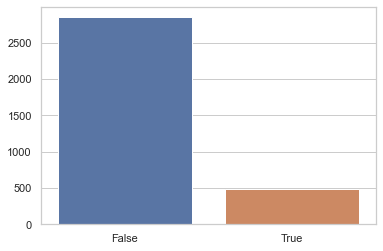

In [11]:
# Checking the distribution of churn values
y = df["churn"].value_counts()
sns.set(style="whitegrid")
sns.barplot(y.index, y.values)
print(df.groupby('churn')['id'].count())

*Note: A major portion of our customers have churn value as False, thereby leaving us with only a small portion of churn customers

In [12]:
# Churn percentage within the dataset
y_True = df["churn"][df["churn"] == True]
print("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 14.491449144914492


In [13]:
# Mean numbers across the two different classes
df.groupby('churn').mean()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


*Note: number vmail messages, total day minutes and customer service calls are significantly different between the classes

In [10]:
# sns.pairplot(df)
# df.plot(kind='scatter', x='year', y='price')
# df.boxplot('price')
# df['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


#### Churn rate by State

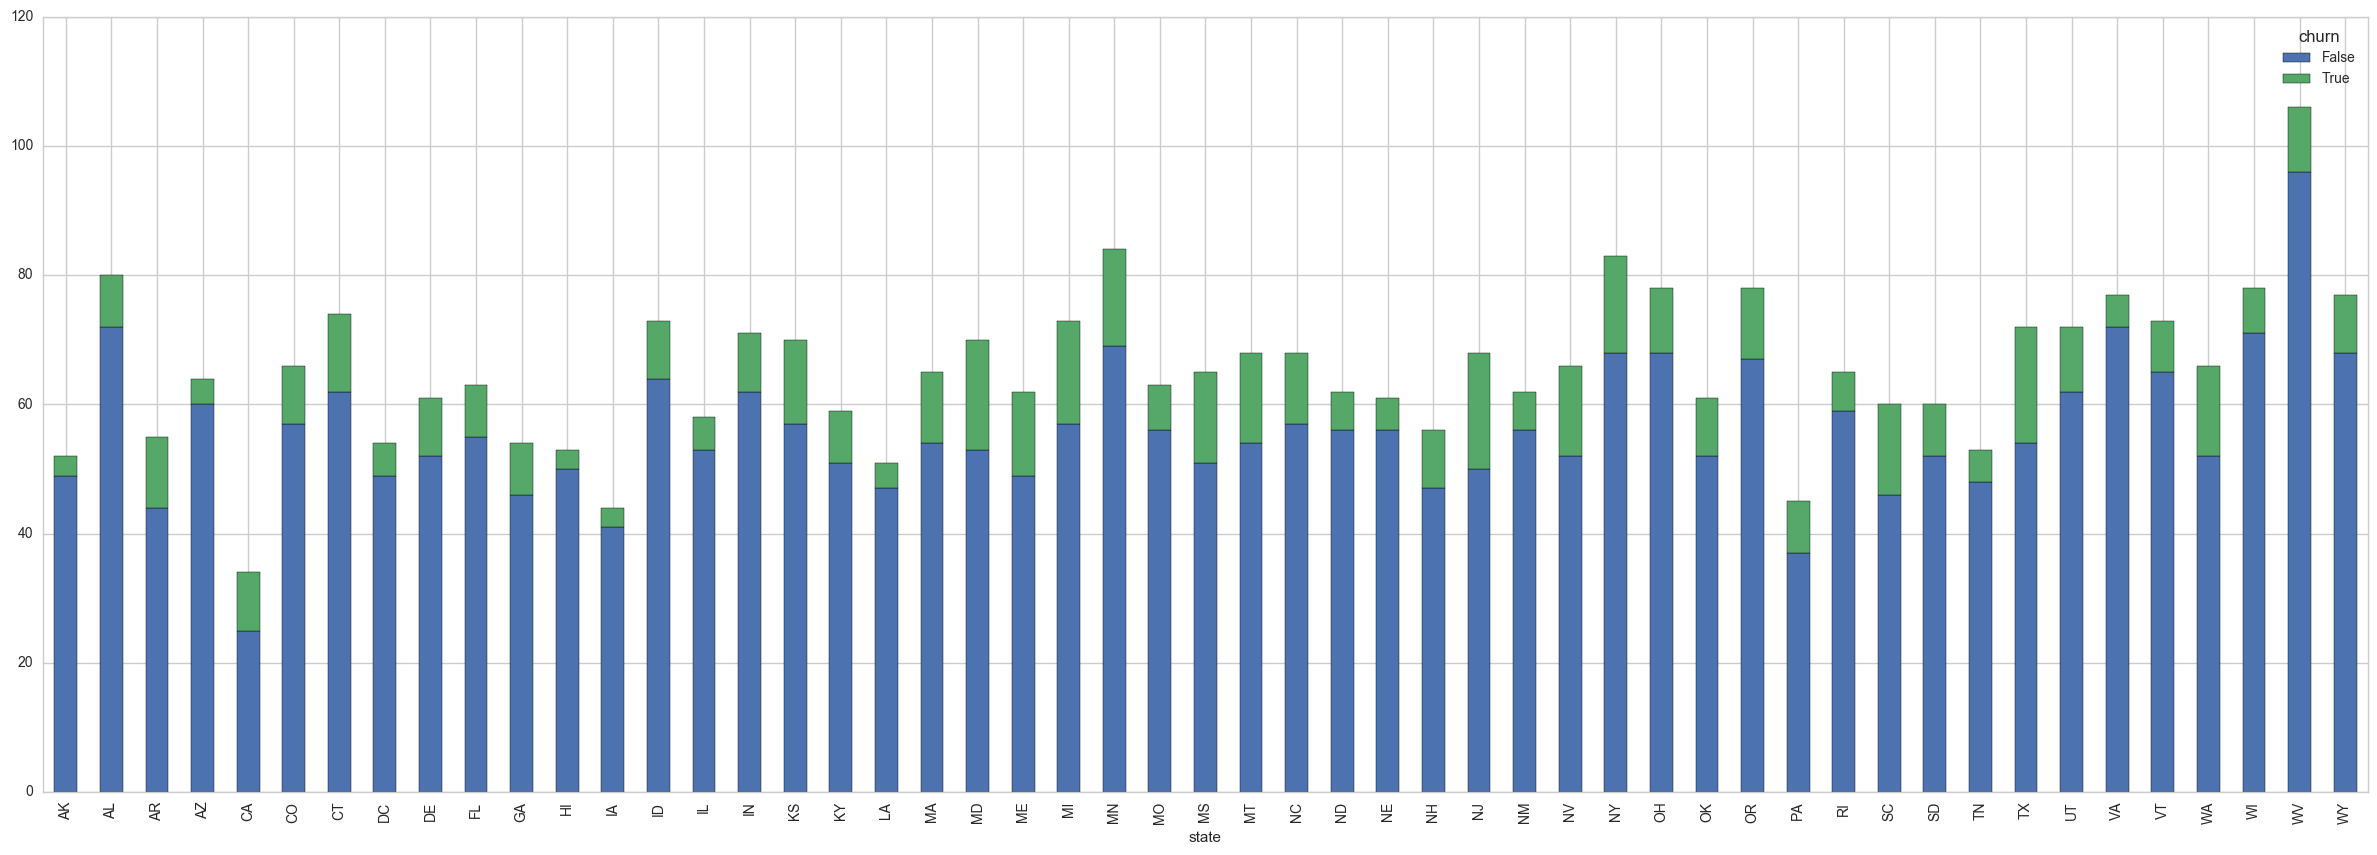

In [10]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

#### Churn rate by Area code

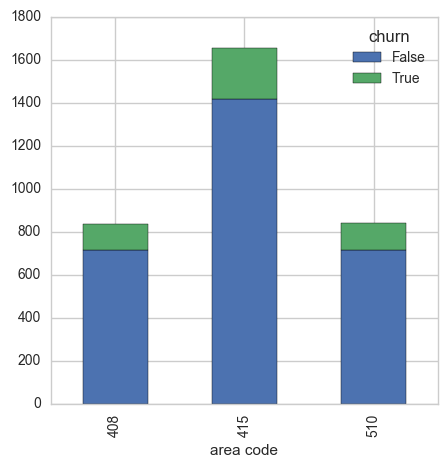

In [11]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

*Note: A major portion of the customers come from area code 415 however there isn't any notable customer churn trend across various area codes

#### Churn rate by International plan

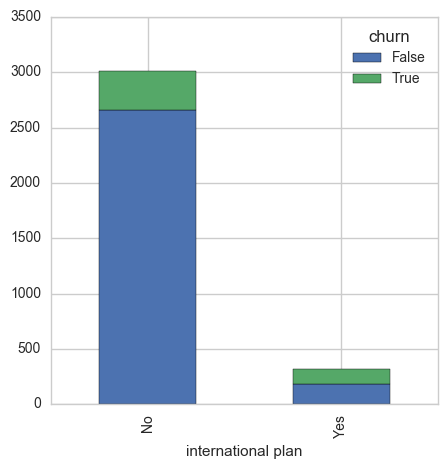

In [12]:
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

*Note: The proportion of churn customers is high with customers who have opted for international plan 

#### Churn rate by Voice mail plan

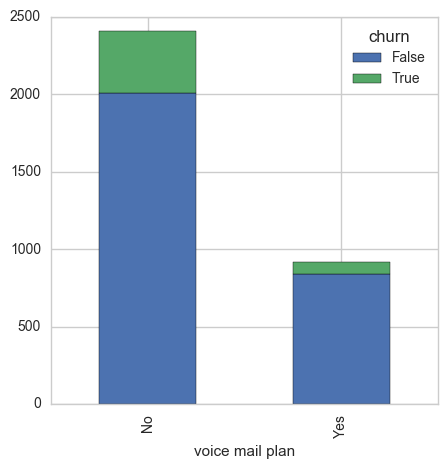

In [13]:
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

*Note: A major of the customers haven't opted for voice mail plan

#### Churn rate by number of Customer service calls

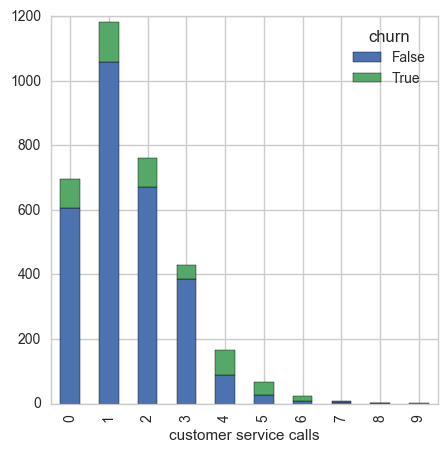

In [14]:
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

*Note: Churn rate is consistently increasing with increased number of customer service calls (except where customer service calls is 3)

## Data Transformation

In [15]:
# Discreet value integer encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [16]:
# State is string and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
print(df.dtypes)

id                         object
state                       int64
account length              int64
area code                   int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [17]:
df.shape

(3333, 21)

In [18]:
df.head()

,id,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,CUST-1,16,128,415,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,CUST-2,35,107,415,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,CUST-3,31,137,415,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,CUST-4,35,84,408,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,CUST-5,36,75,415,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
# storing response variable
y = df['churn'].as_matrix().astype(np.int)
y.size

3333

In [20]:
type(y)

numpy.ndarray

In [21]:
# retaining only independent variables in the dataframe df
df.drop(["id","churn"], axis = 1, inplace=True)
df.head(3)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


In [22]:
df.shape

(3333, 19)

## Feature Engineering

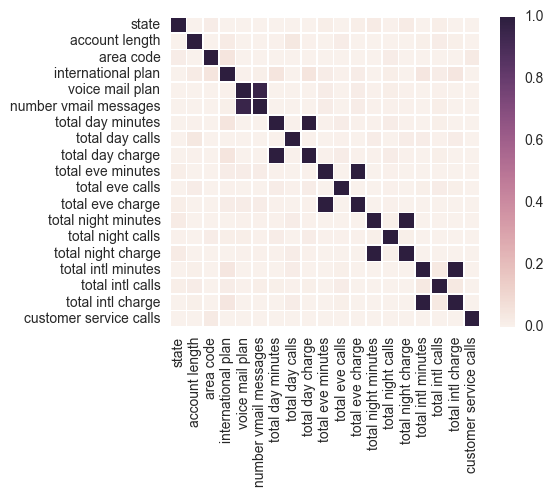

In [23]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, vmin=0, vmax=1, linewidths=.5)

#### Findings: <br>
1) voice mail plan and number vmail messages are highly correlated. This is because only customers who have activated voice mail plan are allowed to send vmail messages. <br>
2) total day/eve/night/intl charge and total day/eve/night/intl minutes are highly correlated. This could be because the company is charging customer as per their call usage time.

In [24]:
# removing reduntant(highly correlated) variables from the list of independent features
df.drop(["voice mail plan","total day charge", "total eve charge", "total night charge", "total intl charge"], axis = 1, inplace=True)
df.head(3)

,state,account length,area code,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0


In [25]:
df.shape

(3333, 14)

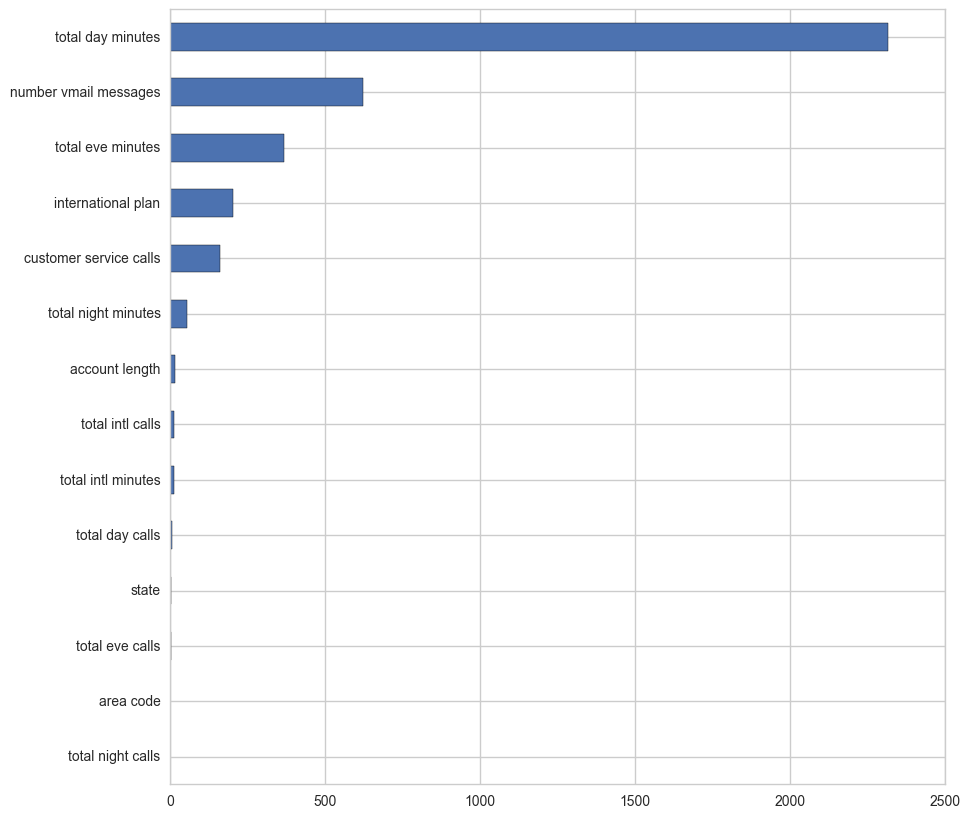

In [26]:
# Feature Selection with Univariate Statistical Tests (Chi-squared for classification)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy
# feature extraction
test = SelectKBest(score_func=chi2, k="all")
fit = test.fit(df, y)
# summarize scores
numpy.set_printoptions(precision=3)
#print(fit.scores_)
feat_imp_chi = pd.Series(fit.scores_, index=df.columns)
feat_imp_chi = feat_imp_chi.sort_values(ascending=True)
feat_imp_chi.plot(kind='barh' , figsize=(10,10)) 

*Note: <br> state, total eve calls, area code, total night calls are the features with low importance

In [27]:
# Feature Selection with RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(df, y)
print("Colnames: %s"% list(df))
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_)

Colnames: ['state', 'account length', 'area code', 'international plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls']
Num Features: 10
Selected Features: [False False  True  True  True  True False  True  True False  True  True
  True  True]
Feature Ranking: [5 4 1 1 1 1 3 1 1 2 1 1 1 1]


*Note:<br> state, account length, total day calls and total night minutes are the features with low importance

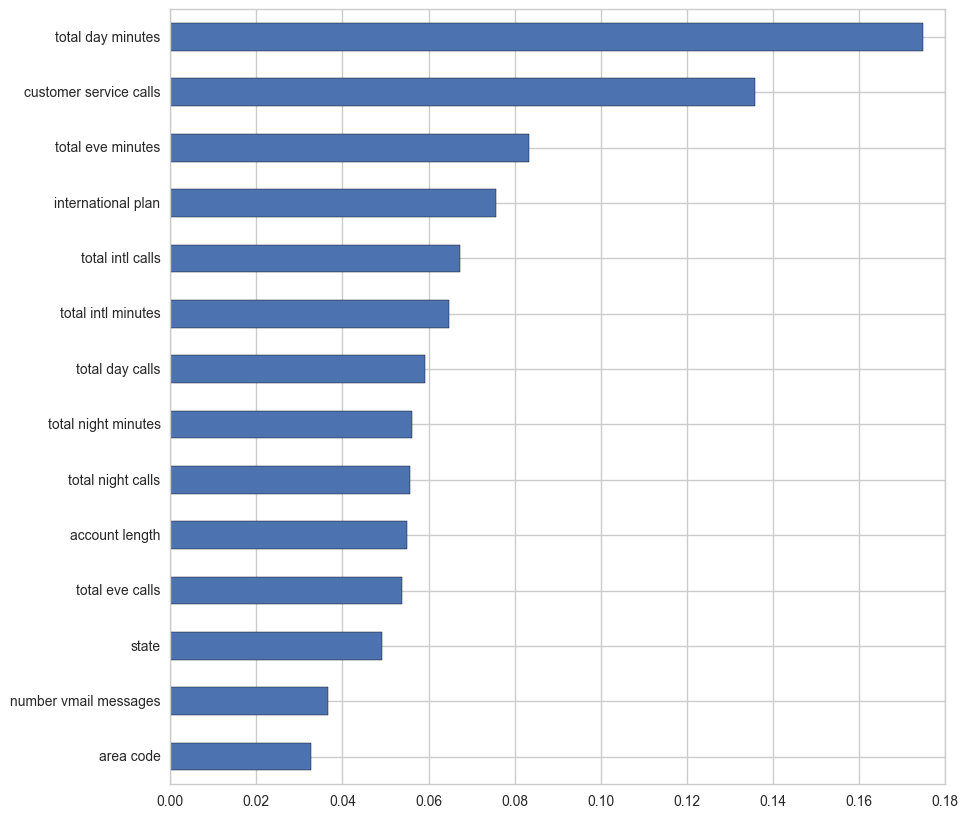

In [28]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(df, y)
#print(model.feature_importances_)
feat_imp = pd.Series(model.feature_importances_, index=df.columns)
feat_imp = feat_imp.sort_values(ascending=True)
feat_imp.plot(kind='barh' , figsize=(10,10)) 

*Note: <br> total night calls, total day calls, number vmail messages and area code are the features with low importance

In [29]:
#removing state, area code and total night calls features from the list of independent variables
df.drop(["state","area code", "total night calls"], axis = 1, inplace=True)
df.head(3)

,account length,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total intl minutes,total intl calls,customer service calls
0,128,0,25,265.1,110,197.4,99,244.7,10.0,3,1
1,107,0,26,161.6,123,195.5,103,254.4,13.7,3,1
2,137,0,0,243.4,114,121.2,110,162.6,12.2,5,0


In [30]:
df.shape

(3333, 11)

## Training/Validation Split

In [31]:
# Splitting the dataset into train and test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)

## Model Building

In [32]:
# 1st iteration
import statsmodels.formula.api as sm
model = sm.Logit(y, df)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.354613
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           10
Date:                Mon, 23 Jul 2018   Pseudo R-squ.:                  0.1430
Time:                        10:10:58   Log-Likelihood:                -1181.9
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 1.432e-78
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
account length            -0.0031      0.001     -2.353      0.019      -0.006      -0.001
international plan         1.9206      0.140     13.741      0.000       1.647       2.195
number vmail messages     -0.0278      0.005     -6.080      0.000      -0.037      -0.019
total day minutes          0.0081      0.001      8.471      0.000       0.006       0.010
total day calls           -0.0128      0.002     -5.422      0.000      -0.017      -0.008
total eve minutes          0.0005      0.001      0.494      0.621      -0.001       0.002
total eve calls           -0.0153      0.002     -6.398      0.000      -0.020      -0.011
total night minutes       -0.0022      0.001     -2.222      0.026      -0.004      -0.000
total intl minutes        -0.0091      0.018     -0.512      0.609      -0.044       0.026
total intl calls          -0.1335      0.024     -5.472      0.000      -0.181      -0.086
customer service calls     0.4094      0.037     11.174      0.000       0.338       0.481
==========================================================================================
"""

*Note: 1st iteraction <br>
p values are greater than 0.05 for total eve minutes and total intl minutes

In [33]:
# 2nd iteration
import statsmodels.formula.api as sm
model = sm.Logit(y, df[['account length',
 'international plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve calls',
 'total night minutes',
 'total intl minutes',
 'total intl calls',
 'customer service calls']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.354650
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3323
Method:                           MLE   Df Model:                            9
Date:                Mon, 23 Jul 2018   Pseudo R-squ.:                  0.1429
Time:                        10:10:58   Log-Likelihood:                -1182.0
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 2.367e-79
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
account length            -0.0030      0.001     -2.318      0.020      -0.006      -0.000
international plan         1.9208      0.140     13.748      0.000       1.647       2.195
number vmail messages     -0.0276      0.005     -6.066      0.000      -0.037      -0.019
total day minutes          0.0082      0.001      8.651      0.000       0.006       0.010
total day calls           -0.0126      0.002     -5.418      0.000      -0.017      -0.008
total eve calls           -0.0150      0.002     -6.433      0.000      -0.020      -0.010
total night minutes       -0.0021      0.001     -2.173      0.030      -0.004      -0.000
total intl minutes        -0.0080      0.018     -0.453      0.651      -0.043       0.027
total intl calls          -0.1325      0.024     -5.452      0.000      -0.180      -0.085
customer service calls     0.4101      0.037     11.202      0.000       0.338       0.482
==========================================================================================
"""

*Note: 2nd iteraction <br>
p value is still greater than 0.05 for total intl minutes

In [34]:
# 3rd iteration
import statsmodels.formula.api as sm
model = sm.Logit(y, df[['account length',
 'international plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve calls',
 'total night minutes',
 'total intl calls',
 'customer service calls']])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.354680
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3324
Method:                           MLE   Df Model:                            8
Date:                Mon, 23 Jul 2018   Pseudo R-squ.:                  0.1428
Time:                        10:10:58   Log-Likelihood:                -1182.1
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 3.606e-80
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
account length            -0.0031      0.001     -2.364      0.018      -0.006      -0.001
international plan         1.9178      0.140     13.738      0.000       1.644       2.191
number vmail messages     -0.0277      0.005     -6.076      0.000      -0.037      -0.019
total day minutes          0.0081      0.001      8.657      0.000       0.006       0.010
total day calls           -0.0129      0.002     -5.674      0.000      -0.017      -0.008
total eve calls           -0.0153      0.002     -6.674      0.000      -0.020      -0.011
total night minutes       -0.0022      0.001     -2.276      0.023      -0.004      -0.000
total intl calls          -0.1339      0.024     -5.542      0.000      -0.181      -0.087
customer service calls     0.4094      0.037     11.194      0.000       0.338       0.481
==========================================================================================
"""

*Note: 3rd iteraction <br>
p values of all independent variables are less than 0.05

### Findings/Insights: <br> 
1) Customers who have opted for International plan are more prone to churn. This might be due to the existing plan being very expensive compared to competitors <br>
2) Customers who approached customer service are more prone to churn. As this may be due to dissatisfactory customer service of the company

## Final Model Selection

In [35]:
# Model from the 3rd iteration is chosen as final model
       
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train[['account length',
 'international plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve calls',
 'total night minutes',
 'total intl calls',
 'customer service calls']], y_train)
y_pred = logreg.predict(X_test[['account length',
 'international plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve calls',
 'total night minutes',
 'total intl calls',
 'customer service calls']])
print('Logistic regression score =',round(metrics.accuracy_score(y_test, y_pred),2))

Logistic regression score = 0.86


In [36]:
# Cross validation using 5 partitions: printing accuracy scores for each iteraction and mean of all iterations
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(logreg, df[['account length',
 'international plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve calls',
 'total night minutes',
 'total intl calls',
 'customer service calls']], y, cv=5, scoring='accuracy') 
print('Logistic regression of each partition\n',scores)
print('Mean score of all the scores after cross validation =',round(scores.mean(),2)) 

Logistic regression of each partition
 [ 0.855  0.856  0.85   0.866  0.859]
Mean score of all the scores after cross validation = 0.86


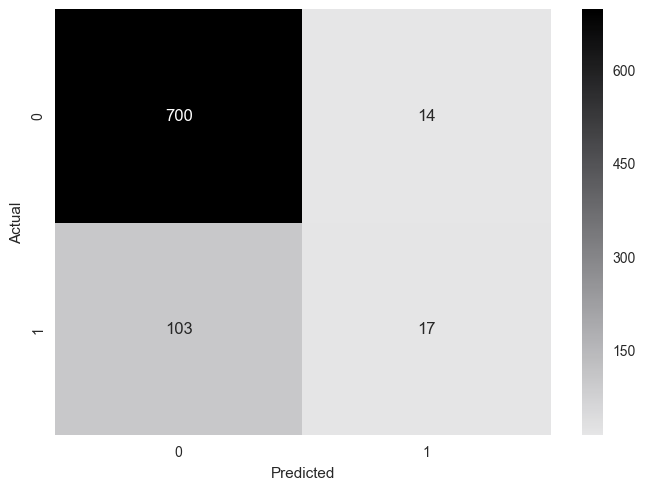

In [37]:
# Confusion matrix to project accuracy of logistic regression model
conf = (metrics.confusion_matrix(y_test, y_pred))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Model Evaluation

In [38]:
# classification report of the logistic model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.98      0.92       714
          1       0.55      0.14      0.23       120

avg / total       0.83      0.86      0.82       834



In [39]:
# Compution of rates for Confusion matrix
FP = conf[1][0]
FN = conf[0][1]
TP = conf[0][0]
TN = conf[1][1]
print('False Positive ',FP)
print('False Negative ',FN)
print('True Positive ',TP)
print('True Negative ',TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('\nTrue Positive Rate(Sensitivity) :',round(TPR,2))
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('\nTrue Negative Rate(Specificity) :',round(TNR,2))
# Precision or positive predictive value
PPV = TP/(TP+FP)
print('\nPositive Predictive Value :',round(PPV,2))
# Negative predictive value
NPV = TN/(TN+FN)
print('\nNegative Predictive Value :',round(NPV,2))
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('\nFalse Positive Rate :',round(FPR,2))
# False negative rate
FNR = FN/(TP+FN)
print('\nFalse Negative Rate :',round(FNR,2))
# False discovery rate
FDR = FP/(TP+FP)
print('\nFalse Discovery Rate :',round(FDR,2))

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('\nOverall accuracy :',round(ACC,2))

False Positive  103
False Negative  14
True Positive  700
True Negative  17

True Positive Rate(Sensitivity) : 0.98

True Negative Rate(Specificity) : 0.14

Positive Predictive Value : 0.87

Negative Predictive Value : 0.55

False Positive Rate : 0.86

False Negative Rate : 0.02

False Discovery Rate : 0.13

Overall accuracy : 0.86


#### Overall model accuracy is estimated to be 86% <br>
Importantly, we are able to predict the customers at risk to churn with 98% accuracy

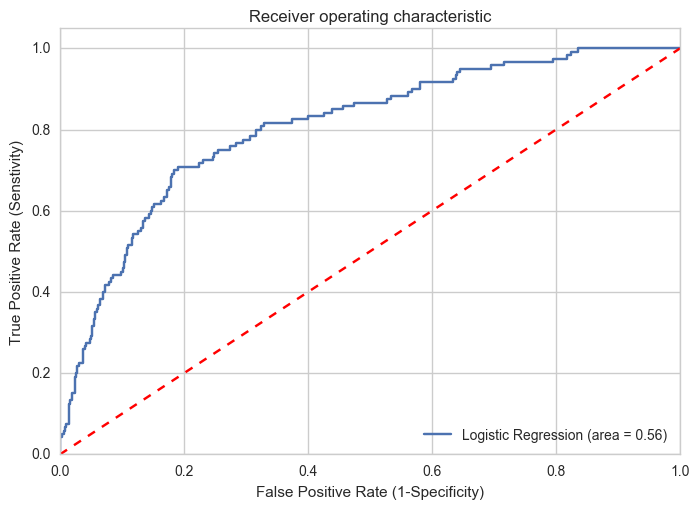

In [40]:
# ROC curve for evaluating model performance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test[['account length',
 'international plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve calls',
 'total night minutes',
 'total intl calls',
 'customer service calls']]))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test[['account length',
 'international plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve calls',
 'total night minutes',
 'total intl calls',
 'customer service calls']])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Senstivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()